# 3 метода интерполяции

### Обязательно, для работы программ необходимо иметь файлы:   
**train.dat**, **train.ans**, **test.dat** с данными для интерполяции, причем данные  
из **test.dat** не могут выходить за пределы диапозона данных из файла **train.dat**  
Программы запишут новые промежуточные значения по построенной интерполяции в файл **test.ans**

# Кусочно-линейная интерполяция на неравномерной сетке


График по интерполированным данным z, f:


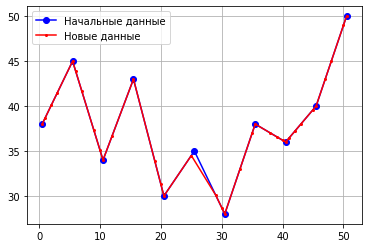

Время вычисления: 0.0008845329284667969


In [23]:
##### Кусочно-линейная интерполяция на неравномерной сетке #####

import numpy as np
import matplotlib.pyplot as plt
import time

# Функция для вычисления значения функции в точке dest по исходным спискам данных x, y
def linear(dest, x, y):      # dest - это точка, в которой мы ищем значение

    n = len(x)

    if dest == x[n-1]:     # Если совпадает с правым краем, возвращаем значение в этой точке
        return y[n-1]

    if (dest < x[0] or dest > x[n-1]):   # Если число выходит за сетку, выходим с ошибкой (задача экстраполяции)
        print('Число выходит за начальные границы')
        return

    for i in range(n-1):   # Ищем индексы левого и правого соседей заданного x
        if x[i] <= dest:   # left, right
            left = i
        if x[i+1] > dest:
            right = i+1
            break

    dest_y = (y[right] - y[left]) / (x[right] - x[left])
    dest_y *= (dest - x[left])
    dest_y += y[left]

    return dest_y



f1 = open('train.dat')          # Файл данных для х
f2 = open('train.ans')          # Файл данных для у
f3 = open('test.dat')           # Файл данных для z
f4 = open('test.ans', 'w')     # Файл для записи данных f

x = [float(i) for i in f1.read().split()]
y = [float(i) for i in f2.read().split()]
z = [float(i) for i in f3.read().split()]

x = np.array(x)
y = np.array(y)
z = np.array(z)
f = np.zeros(len(z))


# Интерполирование: вычисление значений в точках z:

start = time.time()
for i in range(len(z)):     # для каждой точки из z
    f[i] = linear(z[i], x, y)
stop = time.time()

for i in range(len(f)):
    f4.write('%f\n' % f[i])

print('\nГрафик по интерполированным данным z, f:')
plt.plot(x, y, 'bo-', label='Начальные данные', markersize=6)
plt.plot(z, f, 'ro-', label='Новые данные', markersize=2)
plt.grid(True)
plt.legend()
plt.show()

f1.close()
f2.close()
f3.close()
f4.close()
print('Время вычисления:', stop - start)

Как видно из графика, новые значения попадают на линию старого графика

# Интерполяция Лагранжа на неравномерной сетке


График по интерполированным данным z, f:


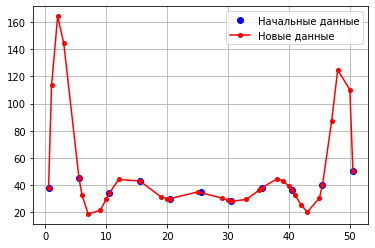


График интерполяции с количеством промежуточных точек 100
(Если количество точек в предыдущем графике меньше, то данный график более гладкий)


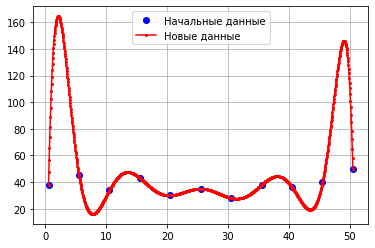


Время вычисления для первого графика: 0.01482701301574707
Время вычислений для втрого графика (1000 точек): 0.3784153461456299


In [24]:
### Интерполяция Лагранжа на неравномерной сетке ###
###  Асимптотика: O(mn²)

import numpy as np
import matplotlib.pyplot as plt
import time

def phi(i, dest):        # Вычисление i-той базисной функции
    n = len(x)

    p = 1
    for j in range(0, n):
        if i != j:
            p = p * (dest - x[j]) / (x[i] - x[j])
    return p


def P(dest):
    n = len(x)

    s = 0
    for i in range(n):
        s = s + y[i] * phi(i, dest)
    return s


f1 = open('train.dat')          # Файл данных для х
f2 = open('train.ans')          # Файл данных для у
f3 = open('test.dat')           # Файл данных для z
f4 = open('test.ans', 'w')     # Файл для записи данных f

x = [float(i) for i in f1.read().split()]
y = [float(i) for i in f2.read().split()]
z = [float(i) for i in f3.read().split()]

x = np.array(x, dtype=float)             # Теперь это numpy массивы
y = np.array(y, dtype=float)

z = np.array(z, dtype=float)            # Можем читать из файла
z_tmp = np.linspace(np.min(x),np.max(x),1000) # или для проверки результата вычислить значения в 1000 точках
f = np.zeros(len(z))
f_tmp = np.zeros(len(z_tmp))

start = time.time()
for i in range(len(z)):  # вычиление
    f[i] = P(z[i])
stop = time.time()


start1 = time.time()
for i in range(len(z_tmp)):  # вычиление
    f_tmp[i] = P(z_tmp[i])
stop1 = time.time()


for i in range(len(z)):  # запись в файл
    f4.write('%f\n' % f[i])



print('\nГрафик по интерполированным данным z, f:')
plt.plot(x, y, 'bo', label='Начальные данные', markersize=6)
plt.plot(z, f, 'ro-', label='Новые данные', markersize=4)
plt.grid(True)
plt.legend()
plt.show()

print('\nГрафик интерполяции с количеством промежуточных точек 100')
print('(Если количество точек в предыдущем графике меньше, то данный график более гладкий)')
plt.plot(x, y, 'bo', label='Начальные данные', markersize=6)
plt.plot(z_tmp, f_tmp, 'ro-', label='Новые данные', markersize=2)
plt.grid(True)
plt.legend()
plt.show()


f1.close()
f2.close()
f3.close()
f4.close()

print('\nВремя вычисления для первого графика:', stop - start)
print('Время вычислений для втрого графика (1000 точек):', stop1 - start1)

# Интерполяция методом кубических сплайнов

A: [-0.05439372  0.1279686  -0.15348066  0.14995406 -0.12633556  0.11538819
 -0.10321721  0.06548066 -0.01470544 -0.00665891  0.        ]
B: [ 0.         -0.81590579  1.10362315 -1.1985868   1.05072405 -0.84430939
  0.88651352 -0.66174469  0.32046525  0.09988369  0.        ]
C: [ 2.75984298 -1.31968596  0.11890084 -0.35591742 -1.09523117 -0.06315789
  0.14786275  1.27170689 -0.43469032  1.66705438  0.        ]
D: [38. 45. 34. 43. 30. 35. 28. 38. 36. 40.  0.]

График по интерполированным данным z, f:


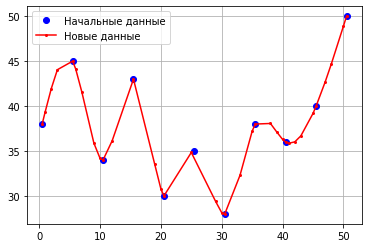


График по интерполированным данным z_tmp, f_tmp (по linspace из 1000 точек):


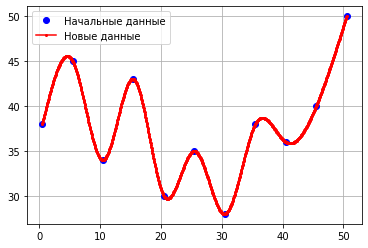


Время вычислений для первого (основоного) графика: 0.0013217926025390625
Время вычислений для втрого графика (1000 точек): 0.02547287940979004


In [25]:
### Интерполяция методом кубических сплайнов на равномерной сетке ###

import numpy as np
import matplotlib.pyplot as plt
import time

def sweep (a, b, c, f):       # В ходе отыскания коэффициентов многочленов будет нужна
    n = f.size                #      функция для решения СЛАУ методом прогонки

    alpha = [0] * (n+1)
    betta = [0] * (n+1)
    x = [0] * (n+1)
    a[0] = 0
    c[n-1] = 0
    alpha[0] = 0
    betta[0] = 0

    for i in range(n):
        d = a[i] * alpha[i] + b[i]
        alpha[i+1] = -c[i] / d
        betta[i+1] = (f[i] - a[i] * betta[i]) / d

    x[n] = 0
    for i in range(n-1, -1, -1):
        x[i] = alpha[i+1] * x[i+1] + betta[i+1]

    x = x[:-1]
    return x



def generateSpline(x, y):           # Коэффициенты строим здесь
    n = x.shape[0] - 1
    h = (x[n] - x[0]) / n

    a = np.array([0] + [1] * (n - 1) + [0])
    b = np.array([1] + [4] * (n - 1) + [1])
    c = np.array([0] + [1] * (n - 1) + [0])
    f = np.zeros(n + 1)

    for i in range(1, n):
        f[i] = 3 * (y[i-1] - 2 * y[i] + y[i+1]) / (h**2)
    s = sweep(a, b, c, f)

    A = np.zeros(n+1)
    B = np.zeros(n+1)
    C = np.zeros(n+1)
    D = np.zeros(n+1)

    for i in range(n):
        B[i] = s[i]

    for i in range(n):
        A[i] = (B[i+1] - B[i]) / (3 * h)
        C[i] = (y[i+1] - y[i]) / h - (B[i+1] + 2 * B[i]) * h / 3
        D[i] = y[i]

    return A, B, C, D



def findValue(dest, x, y, A, B, C, D):       # возвращает значение функции в точке dest
    n = len(x)

    if dest == x[n-1]:
        return y[n-1]

    if dest < x[0] or dest > x[n-1]:
        print('Число %f выходит за область интерполирования' % dest)
        return

    for i in range(1, n):            # Ищем индекс левого соседа числа dest
        if dest < x[i]:
            left = i - 1
            break

    P = A[left] * ((dest - x[left])**3)
    P += B[left] * ((dest - x[left])**2)
    P += C[left] * (dest - x[left])
    P += D[left]

    return P


x = np.array([2,3,4,5])
y = np.array([1,4,2,5])
z = np.linspace(np.min(x), np.max(x), 1000)
f = np.zeros(len(z))


f1 = open('train.dat')          # Файл данных для х
f2 = open('train.ans')          # Файл данных для у
f3 = open('test.dat')           # Файл данных для z
f4 = open('test.ans', 'w')     # Файл для записи данных f

x = [float(i) for i in f1.read().split()]
y = [float(i) for i in f2.read().split()]
z = [float(i) for i in f3.read().split()]

x = np.array(x, dtype=float)             # Теперь это numpy массивы
y = np.array(y, dtype=float)

z = np.array(z, dtype=float)            # Можем читать из файла
z_tmp = np.linspace(np.min(x),np.max(x), 1000) # или для проверки результата вычислить значения в 1000 точках
f = np.zeros(len(z))
f_tmp = np.zeros(len(z_tmp))

A, B, C, D = generateSpline(x, y)
print('A:', A)
print('B:', B)
print('C:', C)
print('D:', D)


start = time.time()
for i in range(len(z)):
    f[i] = findValue(z[i], x, y, A, B, C, D)
stop = time.time()


start1 = time.time()
for i in range(len(z_tmp)):
    f_tmp[i] = findValue(z_tmp[i], x, y, A, B, C, D)
stop1 = time.time()

for i in range(len(z)):
    f4.write('%f\n' % f[i])


print('\nГрафик по интерполированным данным z, f:')
plt.plot(x, y, 'bo', label='Начальные данные', markersize=6)
plt.plot(z, f, 'ro-', label='Новые данные', markersize=2)
plt.grid(True)
plt.legend()
plt.show()

print('\nГрафик по интерполированным данным z_tmp, f_tmp (по linspace из 1000 точек):')
plt.plot(x, y, 'bo', label='Начальные данные', markersize=6)
plt.plot(z_tmp, f_tmp, 'ro-', label='Новые данные', markersize=2)
plt.grid(True)
plt.legend()
plt.show()

print('\nВремя вычислений для первого (основоного) графика:', stop - start)
print('Время вычислений для втрого графика (1000 точек):', stop1 - start1)


f1.close()
f2.close()
f3.close()
f4.close()

